In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.enable_eager_execution()

In [153]:
import numpy as np

In [125]:
X = tf.linspace(-2.0, 1.0, 100)

In [143]:
class Fn():
    def __init__(self, order=8):
        self.order = order
        self.coeffs = [0.1*tf.random_normal([]) for _ in range(order+1)]
        # what about coeffs per dim?
        
    def __call__(self, x):
        return tf.math.polyval(self.coeffs,x)
    
    def grad(self, x):
        with tf.GradientTape() as tape:
            tape.watch(x)
            y = self.__call__(x)
        return tape.gradient(y, x)

In [156]:
def gen_tragectory(fn):
    x = tf.random_normal([])
    xs = [x]

    for _ in range(100-1):
        x = x - 0.01*fn.grad(x)
        xs.append(x)
    return xs

In [157]:
fn = Fn(order=4)

In [158]:
xs = gen_tragectory(fn)

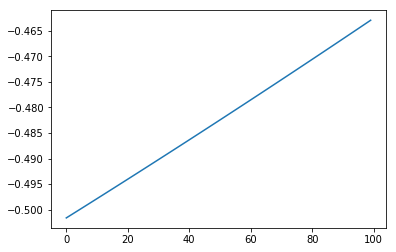

In [159]:
plt.plot(xs)

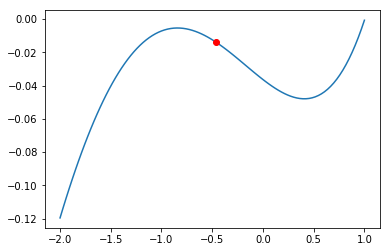

In [160]:
plt.plot(X, fn(X))
plt.plot(xs[-1], fn(xs[-1]), 'ro')

In [164]:
def generate_batch(batch_size):
    return np.array([gen_tragectory(Fn()) for _ in range(batch_size)])

In [169]:
!mkdir /tmp/test

In [170]:
for i in range(100):
    batch = generate_batch(50)
    np.save('/tmp/test/nd_batch{}.npy'.format(i), batch)